In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #For encoding categorical variables
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# Create Dummy Variables

In [3]:
df=pd.get_dummies(data[["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]])
df.head()

,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,1,0,0,1,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,1
1,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,1,0,1,0,1,0
2,1,0,0,1,1,0,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
3,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,1,0,1,0,1,0,1,0,0,1,...,0,0,0,1,1,0,1,0,1,0


In [4]:
le=LabelEncoder()
le

LabelEncoder()

In [5]:
data[["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]]=data[["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]].apply(lambda col : le.fit_transform(col))
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55-59,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,5,0,1,4,8,0,0,0


In [6]:
ohe=OneHotEncoder()
ohe

OneHotEncoder()

In [7]:
ohot_encoded_heart=ohe.fit_transform(np.array(data["HeartDisease"]).reshape(-1, 1)).toarray()
arr_heart=ohot_encoded_heart[:,1].reshape(-1,1)

In [8]:
ohot_encoded_smoke=ohe.fit_transform(np.array(data["Smoking"]).reshape(-1, 1)).toarray()
arr_smoke=ohot_encoded_smoke[:,1].reshape(-1,1)

In [9]:
ohot_encoded_alcohol=ohe.fit_transform(np.array(data["AlcoholDrinking"]).reshape(-1, 1)).toarray()
arr_alcohol=ohot_encoded_alcohol[:,1].reshape(-1,1)

In [10]:
ohot_encoded_stroke=ohe.fit_transform(np.array(data["Stroke"]).reshape(-1, 1)).toarray()
arr_stroke=ohot_encoded_stroke[:,1].reshape(-1,1)

In [11]:
ohot_encoded_diff=ohe.fit_transform(np.array(data["DiffWalking"]).reshape(-1, 1)).toarray()
arr_diff=ohot_encoded_diff[:,1].reshape(-1,1)

In [12]:
ohot_encoded_sex=ohe.fit_transform(np.array(data["Sex"]).reshape(-1, 1)).toarray()
arr_sex=ohot_encoded_sex[:,1].reshape(-1,1)

In [13]:
ohot_encoded_race=ohe.fit_transform(np.array(data["Race"]).reshape(-1, 1)).toarray()
arr_race=ohot_encoded_race[:,1:]

In [14]:
ohot_encoded_diabetic=ohe.fit_transform(np.array(data["Diabetic"]).reshape(-1, 1)).toarray()
arr_diabetic=ohot_encoded_diabetic[:,1:]

In [15]:
ohot_encoded_PhysicalActivity=ohe.fit_transform(np.array(data["PhysicalActivity"]).reshape(-1, 1)).toarray()
arr_PhysicalActivity=ohot_encoded_PhysicalActivity[:,1].reshape(-1,1)

In [16]:
ohot_encoded_GenHealth=ohe.fit_transform(np.array(data["GenHealth"]).reshape(-1, 1)).toarray()
arr_GenHealth=ohot_encoded_GenHealth[:,1:]

In [17]:
ohot_encoded_Asthma=ohe.fit_transform(np.array(data["Asthma"]).reshape(-1, 1)).toarray()
arr_Asthma=ohot_encoded_Asthma[:,1].reshape(-1,1)

In [18]:
ohot_encoded_KidneyDisease=ohe.fit_transform(np.array(data["KidneyDisease"]).reshape(-1, 1)).toarray()
arr_KidneyDisease=ohot_encoded_KidneyDisease[:,1].reshape(-1,1)

In [19]:
ohot_encoded_SkinCancer=ohe.fit_transform(np.array(data["SkinCancer"]).reshape(-1, 1)).toarray()
arr_SkinCancer=ohot_encoded_SkinCancer[:,1].reshape(-1,1)

In [20]:
df_ohot=pd.DataFrame(np.hstack((arr_heart,arr_smoke,arr_alcohol,arr_stroke,arr_diff,arr_sex,arr_race,arr_diabetic,arr_PhysicalActivity,arr_GenHealth,arr_Asthma,arr_KidneyDisease,arr_SkinCancer)),columns=["HeartDisease_Yes","Smoking_Yes","AlcoholDrinking_Yes","Stroke_Yes","DiffWalking_Yes","Sex_Male","Race_Asian","Race_Black","Race_Hispanic","Race_Other","Race_White","Diabetic_No, borderline diabetes","Diabetic_Yes","Diabetic_Yes (during pregnancy)","PhysicalActivity_Yes","GenHealth_Fair","GenHealth_Good","GenHealth_Poor","GenHealth_Very good","Asthma_Yes","KidneyDisease_Yes","SkinCancer_Yes"])

In [21]:
df_ohot.head()

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
data_new=pd.concat([data,df_ohot],axis=1)
data_new.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,1,0,0,3,30,0,0,55-59,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0,20.34,0,0,1,0,0,0,0,80 or older,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20,30,0,1,65-69,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,24.21,0,0,0,0,0,0,0,75-79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28,0,1,0,40-44,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
data_new.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_Yes',
       'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes',
       'Sex_Male', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')

In [24]:
data_new.drop(["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"],axis=1,inplace=True)
data_new.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3,30,55-59,5,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,20.34,0,0,80 or older,7,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26.58,20,30,65-69,8,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,24.21,0,0,75-79,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,23.71,28,0,40-44,8,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
data_new.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')

# Feature Selection

In [26]:
df_x=data_new.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
df_y=data_new.iloc[:,5]

In [27]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [28]:
elm_fit=rfe.fit(df_x, df_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [29]:
elm_fit

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [30]:
elm_fit.support_

array([False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True])

In [31]:
selected=df_x.columns[elm_fit.support_]
selected #This gives the selected columns in the independent data

Index(['Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'Diabetic_Yes',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'KidneyDisease_Yes', 'SkinCancer_Yes'],
      dtype='object')

In [32]:
df_x[selected].head()

,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,KidneyDisease_Yes,SkinCancer_Yes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Logistic Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score

In [34]:
data_new

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3,30,55-59,5,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,20.34,0,0,80 or older,7,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26.58,20,30,65-69,8,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,24.21,0,0,75-79,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,23.71,28,0,40-44,8,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7,0,60-64,6,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,29.84,0,0,35-39,5,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
319792,24.24,0,0,45-49,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
319793,32.81,0,0,25-29,12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data_new.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')

In [36]:
x=data_new.iloc[:,[8,9,10,17,20,21,22,23,25,26]]
y=data_new.iloc[:,5]

In [37]:
x

,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,KidneyDisease_Yes,SkinCancer_Yes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
319790,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
319791,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
319793,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
model=LogisticRegression()

In [41]:
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
model.coef_

array([[1.27524713, 0.55703922, 0.64122754, 0.67937382, 1.78936623,
        1.29303915, 2.18658593, 0.67010215, 0.72354135, 0.67465697]])

In [43]:
model.intercept_

array([-4.28926851])

In [44]:
y_pred=model.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
confusion_matrix(y_test,y_pred)

array([[58066,   446],
       [ 4938,   509]], dtype=int64)

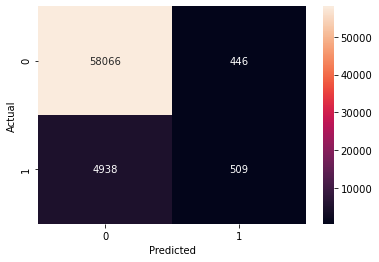

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
accuracy=(np.diag(confusion_matrix(y_test,y_pred)).sum())/len(y_test)
accuracy

0.9158210728748104

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     58512
         1.0       0.53      0.09      0.16      5447

    accuracy                           0.92     63959
   macro avg       0.73      0.54      0.56     63959
weighted avg       0.89      0.92      0.89     63959



In [52]:
y_pred_probs=model.predict_proba(x_test)
y_pred_probs 

array([[0.91976734, 0.08023266],
       [0.97461888, 0.02538112],
       [0.97461888, 0.02538112],
       ...,
       [0.97461888, 0.02538112],
       [0.97389474, 0.02610526],
       [0.97461888, 0.02538112]])

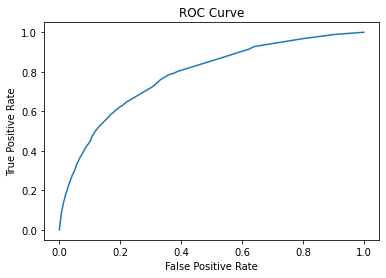

In [55]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_probs[:,1])
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [54]:
auc = roc_auc_score(y_test, y_pred_probs[:,1])
auc

0.7844118246082179